In [1]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

Files already downloaded and verified


In [2]:
# 从cifar100中随机选择一张图片
image, class_id = cifar100[100]
image_input = preprocess(image).unsqueeze(0).to(device)
# token
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)
# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)
# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")



Top predictions:

            crab: 21.90%
          spider: 19.63%
   aquarium_fish: 8.58%
       pine_tree: 5.29%
       palm_tree: 4.59%


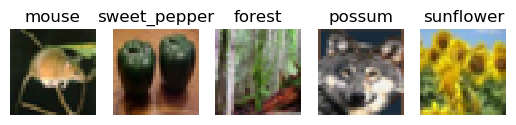

In [16]:
# token
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)
# 从cifar100中随机随即选择5张图片
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 5)
for i in range(5):
    image, class_id = cifar100[np.random.randint(0, 10000)]
    image_input = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(5)
    axs[i].imshow(image)
    axs[i].set_title(f"{cifar100.classes[indices[0]]}")
    axs[i].axis('off')
plt.show()